# Boston House Price

In [2]:
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split # 분류 회귀 둘다 쓰임 
from sklearn.linear_model import LinearRegression #회귀
from sklearn.metrics import mean_absolute_error #(회귀)

In [3]:
# 불러온다 
dataset =  sklearn.datasets.load_boston()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [4]:
data = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [5]:
# 예측할 라벨 
data['price'] = dataset.target

In [6]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [7]:
x = data.drop('price',axis = 1)

In [8]:
y = data['price']

In [59]:
#train 학습할 데이터 
#test 확인할 데이터
# x 는 price 를 제외한 문제지(피쳐) y 는 price  정답이 라벨 
#x_train 학습시킬 문제 y_train 학습시킬 정답 
#x_test 시험문제 Y_test 시험 정답 
x_train,x_test,y_train,y_test = \
train_test_split(x,y, test_size=0.2, random_state=0)

In [60]:
model = LinearRegression()

In [61]:
#  FIT 학습시키다 문제랑 정답을 줘야지 x_train, y_train
model.fit(x_train, y_train)

LinearRegression()

In [62]:
# 정답이 들어가야지 x_train
pre_train = model.predict(x_train)

In [63]:
mean_absolute_error(pre_train, y_train)

3.10315639657944

---

In [64]:
model.fit(x_train, y_train)

LinearRegression()

In [65]:
# score 정확도 
model.score(x_train, y_train)

0.7730135569264234

In [66]:
pre_train = model.predict(x_train)

In [67]:
x_train.iloc[0]

CRIM         0.35809
ZN           0.00000
INDUS        6.20000
CHAS         1.00000
NOX          0.50700
RM           6.95100
AGE         88.50000
DIS          2.86170
RAD          8.00000
TAX        307.00000
PTRATIO     17.40000
B          391.70000
LSTAT        9.71000
Name: 220, dtype: float64

In [68]:
pre_train[0]

32.55692655238984

In [69]:
y_train.iloc[0]

26.7

-

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
corr = data.corr().round(2)

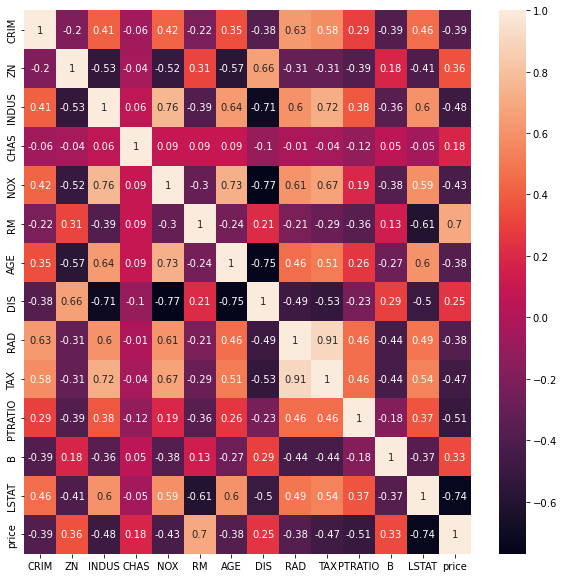

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot= True);

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
model2 = GradientBoostingRegressor()

In [75]:
model2.fit(x_train, y_train)

GradientBoostingRegressor()

In [76]:
pre_train = model2.predict(x_train)

In [77]:
mean_absolute_error(pre_train, y_train)

0.9772584284948597

In [78]:
pre_test = model2.predict(x_test)

In [79]:
mean_absolute_error(pre_test, y_test)

2.6829109011636794

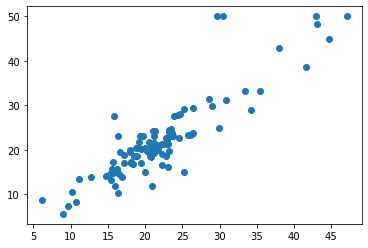

In [80]:
plt.scatter(pre_test, y_test)

In [81]:
real = x_train.iloc[0].values.reshape(1,-1)

In [82]:
print(' 이 집의 가격은 : ',round(model2.predict(real)[0],2), ' 로 예상됩니다' )

 이 집의 가격은 :  28.68  로 예상됩니다


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [83]:
x_train.iloc[0]

CRIM         0.35809
ZN           0.00000
INDUS        6.20000
CHAS         1.00000
NOX          0.50700
RM           6.95100
AGE         88.50000
DIS          2.86170
RAD          8.00000
TAX        307.00000
PTRATIO     17.40000
B          391.70000
LSTAT        9.71000
Name: 220, dtype: float64